trainerror 1.0606651654811712
testerror 1.243345786045708


Text(0.5,1,'θ = 1,64,10,0')

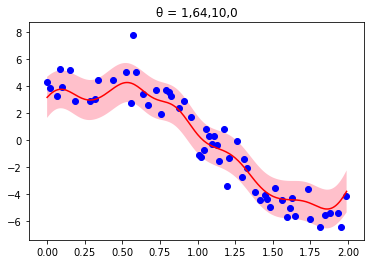

In [101]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg
import math

#讀資料分資料
C = pd.DataFrame(np.random.randint(low=0, high=1, size=(60,60)))
df = pd.read_csv('gp.csv',header=None)
train_x = df.iloc[0:60,0:1]
train_y = df.iloc[0:60,1:2]
test_x = df.iloc[60:120,0:1]
test_y = df.iloc[60:120,1:2]


#定義找出covariance matrix的函數
def build_C(θ0,θ1,θ2,θ3):
    for i in range(0,60):
        for j in range(0,60):
            if i == j:
                b=1
            if i != j:
                b=0
            a = (train_x.iloc[i,0]-train_x.iloc[j,0])*(train_x.iloc[i,0]-train_x.iloc[j,0])
            C.iloc[i,j] = θ0*math.exp(-(θ1/2)*a)+θ2+θ3*(train_x.iloc[i,0]*train_x.iloc[j,0])+b
            

build_C(1,64,10,0)


#定義找出預測值的mean,standard deviation 的函數
def find(x,θ0,θ1,θ2,θ3):
    k = pd.DataFrame(np.random.randint(low=0, high=1, size=(60,1)))

    for i in range(0,60):
        a = (x-train_x.iloc[i,0])*(x-train_x.iloc[i,0])
        b = x*train_x.iloc[i,0]
        k.iloc[i,0] = θ0*math.exp(-(θ1/2)*a)+θ2+θ3*b
    k_trans = np.transpose(k)
    c_vin = np.linalg.inv(C)
    final = np.dot(k_trans,c_vin)
    final = np.dot(final,train_y)
    
    small_c = θ0*math.exp(0)+θ2+θ3*x*x
    variance = math.sqrt(small_c-np.dot(np.dot(k_trans,c_vin),k)[0][0])+1
    return final[0][0],variance


#計算train,test的error
trainerror = 0
testerror = 0
for i in range(0,60):
    x = train_x.iloc[i,0]
    y = train_y.iloc[i,0]
    m,v = find(x,1,64,10,0)
    dis = (m-y)*(m-y)
    trainerror = trainerror+dis
    
for i in range(0,60):
    x = test_x.iloc[i,0]
    y = test_y.iloc[i,0]
    m,v = find(x,1,64,10,0)
    dis = (m-y)*(m-y)
    testerror = testerror+dis  
    
trainerror = math.sqrt(trainerror/60)
testerror = math.sqrt(testerror/60)
print('trainerror',trainerror)
print('testerror',testerror)





#畫圖
plotx = []
ploty = []
plotmin = []
plotmax = []
x = 0
for i in range (0,200):
    plotx.append(x)
    mean,var = find(x,1,64,10,0)
    ploty.append(mean)
    plotmin.append(mean-var)
    plotmax.append(mean+var)
    x=x+0.01


plotpointx = train_x.values    
plotpointy = train_y.values    
    
    
plt.fill_between(plotx, plotmax, plotmin,facecolor = "pink")
plt.plot(plotx,ploty,color = 'red')
plt.scatter(plotpointx,plotpointy,color = 'blue')
 
plt.title('θ = 1,64,10,0')